In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from math import floor
import pprint
import random
#%matplotlib inline # Only use this if using iPython

Let there by $2^n+1$ uniformly spaced points in $[0,1-2^{-n}]$. Then 
$$x_i = i2^{-n}$$ where $i\in \{0,.....,2^{n}\}$
$$ y_i = 0 \quad \text{if i is even}$$
$$ y_i = 1 \quad \text{if i is odd}$$


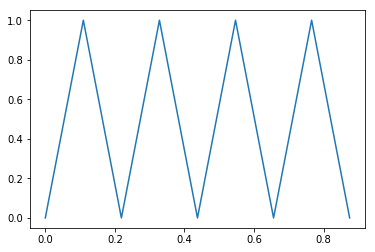

In [2]:
'''2a'''

n = 3
points = np.linspace(0,1-2**(-n),2**n+1) #creating 2^n points


Y=np.zeros(2**n+1)   #create y with 010101010
for i in range(int(2**n/2)):
    Y[2*i+1] = 1 

plt.plot(points,Y);  #sawtooth graph

Input: [(0, 0), (0, 1), (1, 0), (1, 1)]
Output after applying XOR: [0, 1, 1, 0]



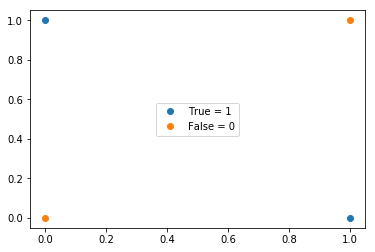

In [3]:
'''2b'''

input = []
for i in [0,1]:
    for j in [0,1]:
        input.append((i,j))

X_false = [0,1]
Y_false = [0,1]

X_true = [1,0]
Y_true = [0,1]

def XOR(vector):
    if vector[0] == vector[1]:
        return 0
    else: 
        return 1
    
output = list(map(XOR,input))

plt.plot(X_true,Y_true,'.',label = 'True = 1',markersize = 12)
plt.plot(X_false,Y_false,'.',label = 'False = 0',markersize = 12)
plt.legend(loc = 10)

print('Input: {}'.format(input))
print('Output after applying XOR: {}\n'.format(output))

As seen in lectures, the `1-layer neural networks` cannot predict the function `XOR`. 1-layer neural nets can only classify linearly separable sets, however, as we have seen, the __Universal Approximation Theorem__ states that a `2-layer network` can approximate any function, given a complex enough architecture.

6


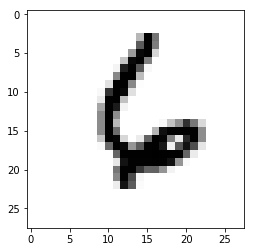

In [4]:
'''2ci'''
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#function to visualize the images

def plot_image(index):
    '''plots the image when you give it an index and returns the correct output'''
    print(y_train[index]) # The label is 8
    plt.imshow(x_train[index], cmap='Greys')
    
index = 59000
plot_image(index)

In [39]:
'''2cii'''
'''Need to stretch matrix of image into a vector of dim 784 (28x28)'''

def flatten(image):
    return image.flatten()
image = x_train[0]
#print(image)
flatten(image)[60:200]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30,
        36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242,
       195,  64,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

#### 2ciii and 2civ

I have already done these steps in 2ci so please look above where my $N = 784$ and my $M = 60,000$ where $M$ is training data. The size of my whole data is $70,000$

In [6]:
def mini_batch(batch_size = 20,batch_number = 1,data_set = x_train):
    train_length = len(data_set)
    
    if batch_size>=train_length:
        print('maximum size of mini_batch can be: {}'.format(train_length))
    else:
        index = (batch_number - 1)*batch_size
        if index+batch_size-1>=train_length and train_length-1-index>0:
            return data_set[index:]
        elif train_length-1-index<=0:
            return 'batch_number is too large for the size for mini-batch provided. Adjust your batch_number to <= {}'.format(floor((train_length-1)/batch_size)+1)
        else:
            return data_set[index:index+batch_size]

# having a batch_size of 16-32 is always best
mini_batch(batch_size = 30,batch_number = 60) #since there are only 60,000 training points

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

#### Task 4 

`https://mlfromscratch.com/neural-networks-explained/#cost-function`

`http://neuralnetworksanddeeplearning.com/chap2.html`

In [6]:
'''Different Activation functions'''

class Tanh:
    def activation(self,z):
        return np.tanh(z)
    
    def derivative_activation(self,z):
        return (np.cosh(z))**(-2)
    
class Sigmoid:
    def activation(self,z):
        return 1/(1+np.exp(-z))
    
    def derivative_activation(self,z):
        return self.activation(z)*(1-self.activation(z))
    
class Relu:
    def activation(self,z):
        return np.maximum(0,z)
    
    def derivative_activation(self,z):
        z[z<=0 ] = 0
        z[z>0] = 1
        return z

In [8]:
class NN(Tanh):
    def __init__(self,X,Y, learning_rate = 0.1):
        self.X = X
        self.Y = Y
        self.lr = learning_rate  
        
    def initialize_parameters(self):
        '''Initializes all the parameters in NN and stores it in a dictionary'''

        X,Y = self.X, self.Y
        n_row = X.shape[0]   #gives me 2
        n_col = X.shape[1] #give me 4
        n_y = Y.shape[0]   #gives you 1, i.e. dimension of the output layer

        W1 = np.random.randn(n_col, n_row)
        b1 = np.zeros((n_col, 1))

        W2 = np.random.randn(n_y, n_col)
        b2 = np.random.randn(n_y, Y.shape[1])  #A1.shape[1] = 4

        parameters = {"W1" : W1, "b1": b1,
                      "W2" : W2, "b2": b2}
        return parameters
    
    def forward_propagation(self,parameters):
        X = self.X
        
        W1 = parameters["W1"]
        W2 = parameters["W2"]
        b1 = parameters["b1"]
        b2 = parameters["b2"]
        
        Z1 = W1@X + b1
        A1 = self.activation(Z1)
        
        Z2 = W2@A1 + b2
        A2 = self.activation(Z2)
        #print(A2)
        
        cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
        return cache
    
    def backward_propagation(self,epochs = 10000):
        X, Y = self.X, self.Y
        parameters = self.initialize_parameters() #only needed at the start
        
        m = X.shape[1]
        Cost = np.zeros(epochs)
        
        for i in range(epochs):
            (Z1, A1, W1, b1, Z2, A2, W2, b2) = self.forward_propagation(parameters)
            delta2 = np.multiply((A2-Y),self.derivative_activation(Z2))

            Cost[i] = 0.5*np.sum((A2-Y)**2)   #cost function in each loop
            
            dW2 = delta2@A1
            db2 = delta2 #np.sum(dZ2, axis = 1, keepdims=True)

            delta1 = np.multiply(W2.T@delta2, self.derivative_activation(Z1))
            dW1 = X@delta1
            db1 = delta1

            #adjusting the weights and biases (i.e. nudging them slightly)
            W2 = W2 - delta2.dot(A1)*(self.lr/m)
        
            b2 = b2 - np.sum(db2, axis = 1, keepdims=True)*(self.lr/m)

            W1 = W1 - delta1.dot(X.T)*(self.lr/m)
            b1 = b1 - np.sum(db1, axis = 1, keepdims=True)*(self.lr/m)

            # the nudged weights and biases become your new parameters
            parameters = {"W1" : W1, "b1": b1,
                          "W2" : W2, "b2": b2}

        return parameters, A2, Cost
        

#### Task 4a (n-ap) 

Wall time: 31 ms
{'W1': array([[-0.30680778,  0.73565579, -0.71511536,  3.21842085, -0.74838698,
        -0.13595865,  0.50595798,  0.51578523,  0.70163324]]),
 'W2': array([[ 0.44603051],
       [ 2.02041302],
       [ 0.09667524],
       [ 0.7370033 ],
       [ 0.14812904],
       [ 0.79022968],
       [-1.44011787],
       [-0.77967671],
       [ 0.47036615]]),
 'b1': array([[0.00523328]]),
 'b2': array([[-0.42739296],
       [ 0.04817085],
       [-0.09263563],
       [ 1.26829502],
       [-0.14193942],
       [ 2.17101551],
       [ 1.37994201],
       [ 2.72399947],
       [-0.45071173]])}

Activation Function: Tanh

Desired Output: [0.] [1.] [0.] [1.] [0.] [1.] [0.] [1.] [0.]

Output from neural network after 500 epochs:
 [2.84319814e-05] [0.96286096] [6.16251238e-06] [0.96214394] [9.44240835e-06] [0.99429388] [-9.17995602e-05] [0.96231634] [2.99832442e-05]



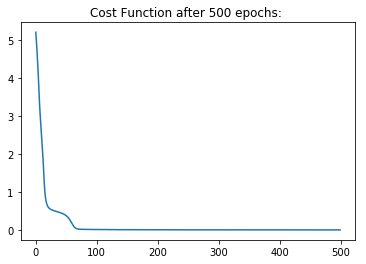

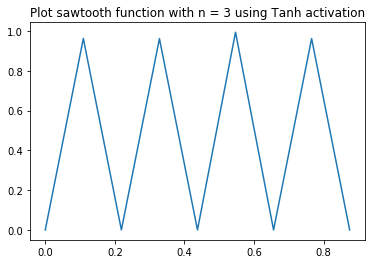

In [9]:
n = 3
X = np.array([[i] for i in np.linspace(0,1-2**(-n),2**n+1)])

Y=np.zeros((2**n+1,1))   #create y with 010101010
for i in range(int(2**n/2)):
    Y[2*i+1] = 1 

blah1 = NN(X,Y,learning_rate = 0.1)
epochs = 500
%time parameters, A2, Cost = blah1.backward_propagation(epochs = epochs)

pprint.pprint(parameters)
print('\nActivation Function: {}'.format(blah1.__class__.__bases__[0].__name__))
print('\nDesired Output:',*blah1.Y)
print("\nOutput from neural network after {} epochs:\n ".format(epochs),end='')
print(*A2)
print('')
plt.plot(Cost);
plt.title('Cost Function after {} epochs: '.format(epochs))
plt.show()

plt.plot(X, A2);
plt.title('Plot sawtooth function with n = {} using {}\
 activation'.format(n,blah1.__class__.__bases__[0].__name__));

##### Task 4b (XOR Problem)

{'W1': array([[-1.08123715, -0.54309983],
       [-1.73742514,  0.78424109],
       [ 2.63573396, -0.86199578],
       [ 0.75092963,  0.8948772 ]]),
 'W2': array([[-0.83346333,  0.12195009, -0.05632569,  1.73915782]]),
 'b1': array([[ 0.47513212],
       [-0.17486064],
       [-0.16123176],
       [ 0.02902263]]),
 'b2': array([[0.33460824, 0.43406655, 0.57980925, 2.72347241]])}

Activation Function: Tanh

Desired Output: [0 1 1 0]

Output from neural network after 2000 epochs: [0.00429593 0.9532083  0.96357586 0.9998834 ]



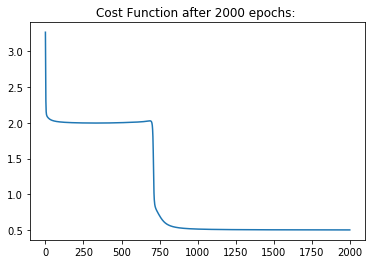

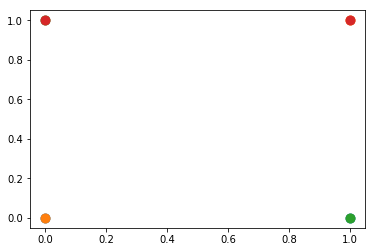

In [10]:
X = np.array([[0,0,1,1],[0,1,0,1]])
Y = np.array([[0,1,1,0]])

blah = NN(X,Y)
epochs = 2000
parameters, A2, Cost = blah.backward_propagation(epochs = epochs)

pprint.pprint(parameters)
print('\nActivation Function: {}'.format(blah.__class__.__bases__[0].__name__))
print('\nDesired Output:',*blah.Y)
print("\nOutput from neural network after {} epochs: \
".format(epochs),end='')
print(*A2)
print('')
plt.plot(Cost);
plt.title('Cost Function after {} epochs: '.format(epochs))
plt.show()
plt.plot(X,'.', markersize=18);


In [7]:


batch_size = 50
train_length = x_train.shape[0]

np.random.shuffle(x_train) #randomly shuffles the trainig data
np.random.shuffle(x_train) #randomly shuffles the trainig data
np.random.shuffle(x_train) #randomly shuffles the trainig data
np.random.shuffle(x_train) #randomly shuffles the trainig data
np.random.shuffle(x_train) #randomly shuffles the trainig data
#print(x_train)

no_of_batches = floor((train_length-1)/batch_size)+1
epochs = 10000


for number in range(1,no_of_batches+1):
    x_train_batch = mini_batch(batch_size,batch_number = number, data_set = x_train)
    y_batch = mini_batch(batch_size,batch_number = number, data_set = y_train)
    


8


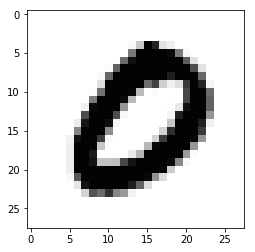

4


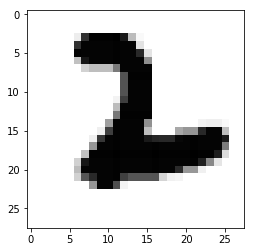

0


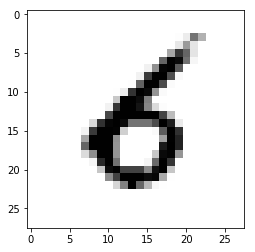

7


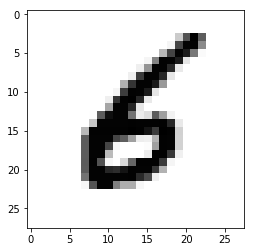

1


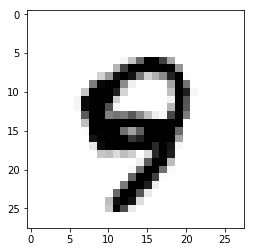

3


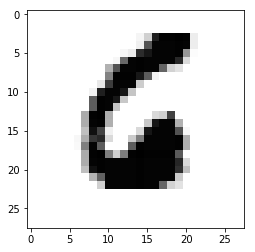

5


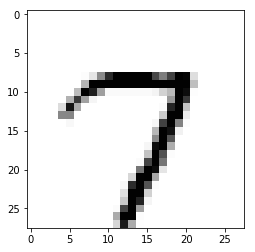

3


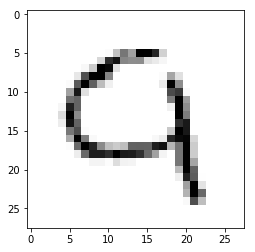

1


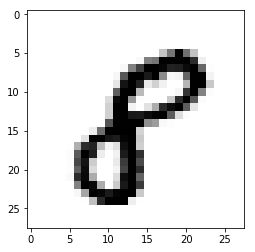

6


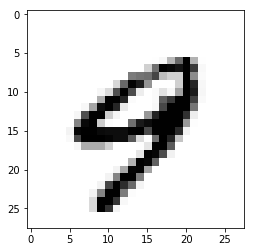

5


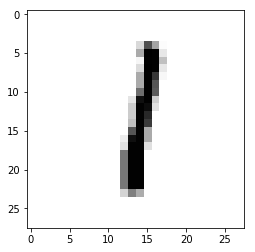

3


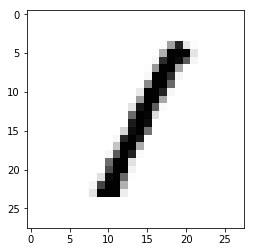

8


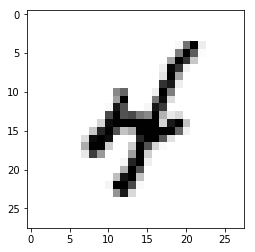

7


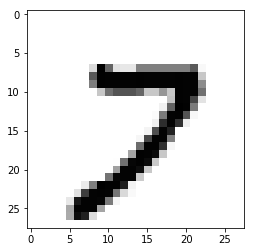

3


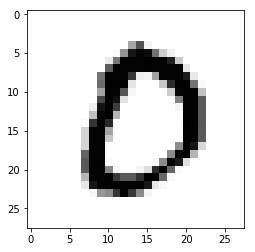

1


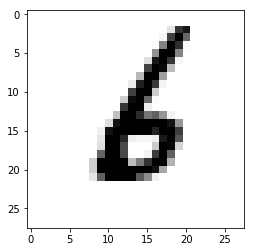

6


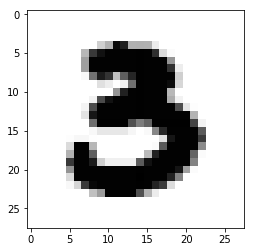

8


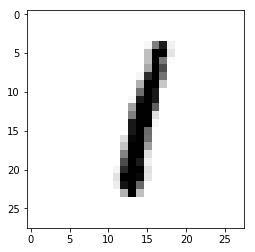

5


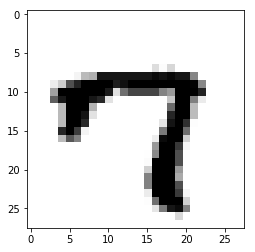

9


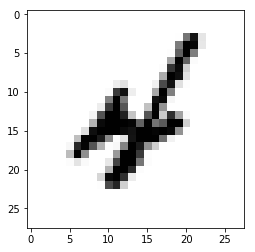

2


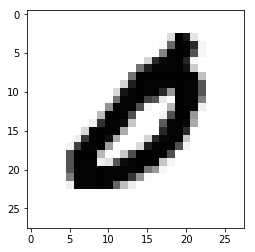

2


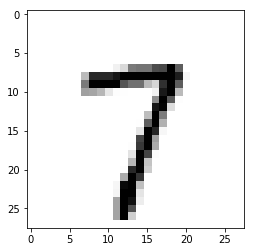

0


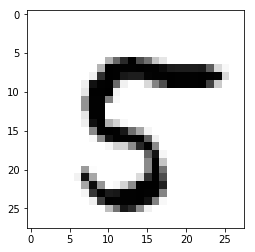

9


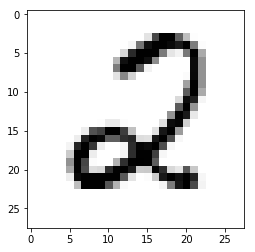

2


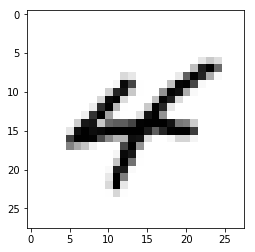

4


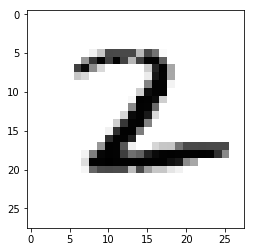

6


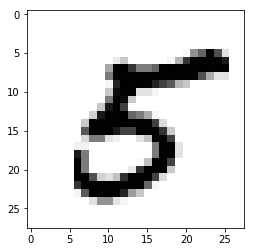

7


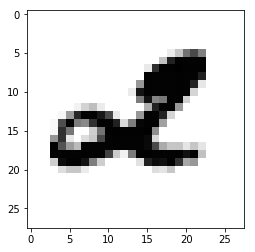

3


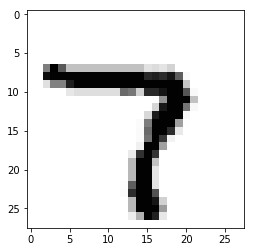

1


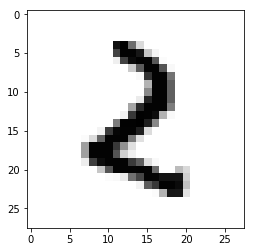

3


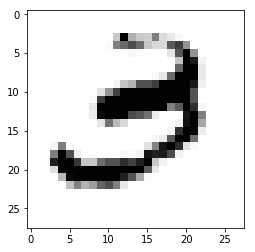

6


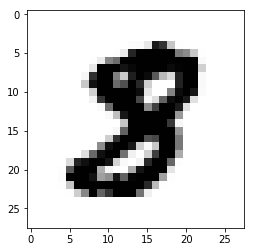

6


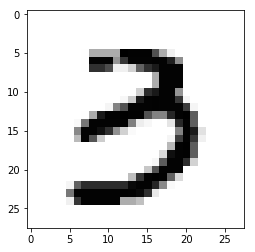

2


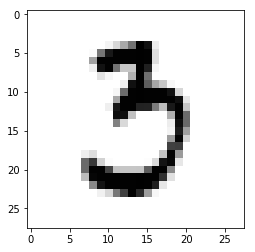

1


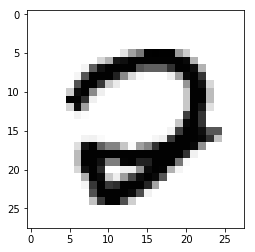

2


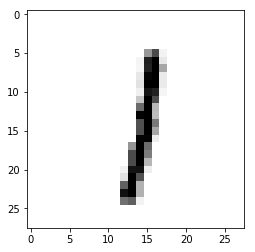

6


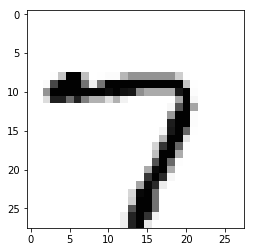

0


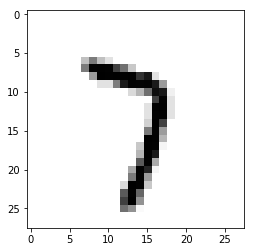

7


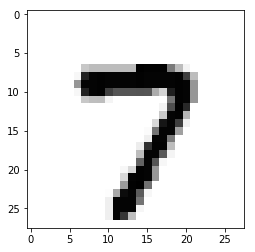

8


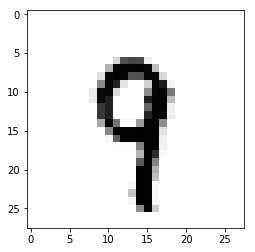

9


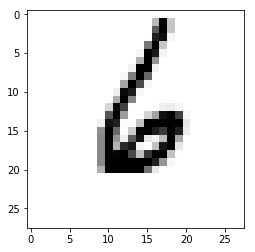

2


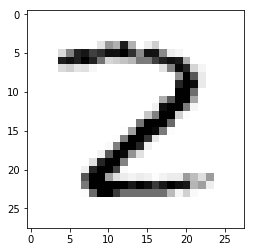

9


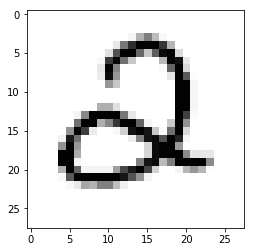

5


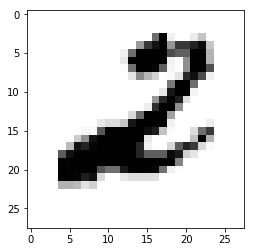

1


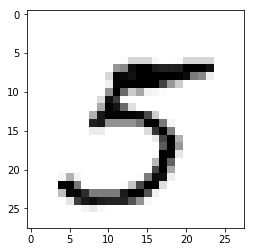

8


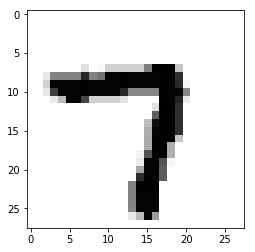

3


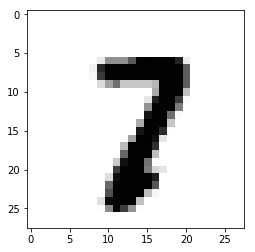

5


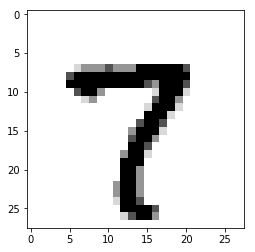

6


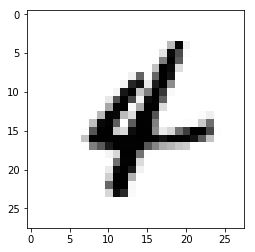

8


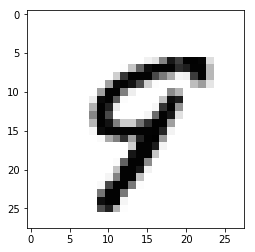

In [9]:
def plot_image(index):
    'plots the image when you give it an index and returns the correct output'
    print(y_batch[index]) # The label is 8
    plt.imshow(x_train_batch[index], cmap='Greys')
    
for index in range(len(y_batch)):
    plot_image(index)
    plt.show()